In [1]:
import pandas as pd

In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/segmentation_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset and summary information
data_head = data.head()
data_info = data.info()

data_head, data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


(          ID  Sex  Marital status  Age  Education  Income  Occupation  \
 0  100000001    0               0   67          2  124670           1   
 1  100000002    1               1   22          1  150773           1   
 2  100000003    0               0   49          1   89210           0   
 3  100000004    0               0   45          1  171565           1   
 4  100000005    0               0   53          1  149031           1   
 
    Settlement size  
 0                2  
 1                2  
 2                0  
 3                1  
 4                1  ,
 None)

## Data Preprocessing

In [5]:
# Data Cleaning and Feature Selection

# Checking for any unrealistic or extreme values in 'Age' and 'Income' columns
age_describe = data['Age'].describe()
income_describe = data['Income'].describe()

# For feature selection, we exclude 'ID' as it is just an identifier
selected_features = data.drop(columns=['ID'])

age_describe, income_describe, selected_features.head()

(count    2000.000000
 mean       35.909000
 std        11.719402
 min        18.000000
 25%        27.000000
 50%        33.000000
 75%        42.000000
 max        76.000000
 Name: Age, dtype: float64,
 count      2000.000000
 mean     120954.419000
 std       38108.824679
 min       35832.000000
 25%       97663.250000
 50%      115548.500000
 75%      138072.250000
 max      309364.000000
 Name: Income, dtype: float64,
    Sex  Marital status  Age  Education  Income  Occupation  Settlement size
 0    0               0   67          2  124670           1                2
 1    1               1   22          1  150773           1                2
 2    0               0   49          1   89210           0                0
 3    0               0   45          1  171565           1                1
 4    0               0   53          1  149031           1                1)

In [6]:
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Convert the scaled features to a DataFrame for better readability
scaled_features_df = pd.DataFrame(scaled_features, columns=selected_features.columns)

scaled_features_df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298


## Determinng Number of Clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

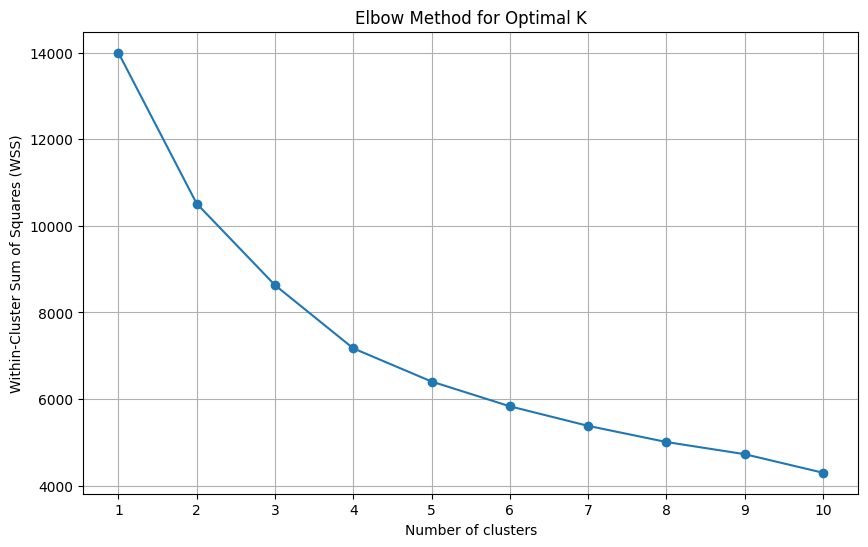

In [7]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determining the optimal number of clusters using the Elbow method
wss = []
cluster_range = range(1, 11)  # Testing 1 to 10 clusters

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features_df)
    wss.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, wss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Squares (WSS)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


In [8]:
# Choosing 4 clusters for K-means clustering
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_features_df)

# Adding the cluster labels to the original data for interpretation
data['Cluster'] = kmeans.labels_

# Displaying the first few rows of the dataset with cluster labels
clustered_data_head = data.head()
clustered_data_head

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,2
2,100000003,0,0,49,1,89210,0,0,1
3,100000004,0,0,45,1,171565,1,1,3
4,100000005,0,0,53,1,149031,1,1,3


In [9]:
# Analyzing the clusters
cluster_analysis = data.groupby('Cluster').mean()

# Displaying the mean values of each feature for each cluster
cluster_analysis

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,,
0,1.000009e+08,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,1.000013e+08,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,1.000011e+08,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,1.000007e+08,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


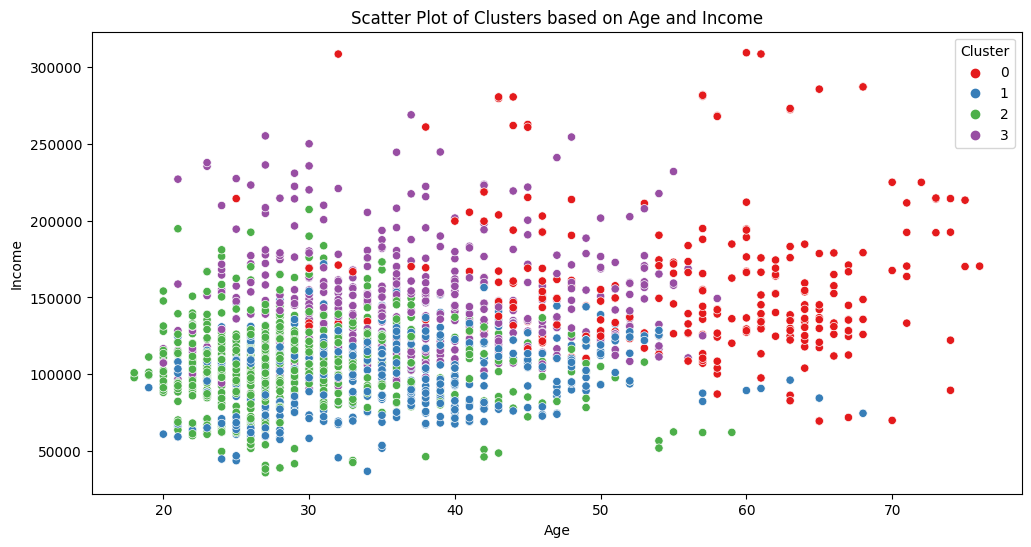

In [10]:
import seaborn as sns

# Preparing visualizations for the clusters

# Selecting a couple of features for visualization: 'Age' and 'Income'
plt.figure(figsize=(12, 6))

sns.scatterplot(x='Age', y='Income', hue='Cluster', data=data, palette='Set1')
plt.title('Scatter Plot of Clusters based on Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()